In [200]:
import pandas as pd
from sklearn import model_selection, linear_model, svm, preprocessing, ensemble, feature_selection
import matplotlib.pyplot as plt

## Load the dataset

In [201]:
input_file = "data.csv"
df = pd.read_csv(input_file, header = 0)

### Split into input (X) and output (y) variables

In [202]:
dataset = df.values
X = dataset[:,1:7]
y = dataset[:,7]
y = y.astype('int')

In [203]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [204]:
fs = [0.15940957, 0.13788721, 0.17424087, 0.16455568, 0.17854944, 0.18535723]
#X_std = X_std * fs

## Testing for best parameters

In [205]:
rbf_svm_cross_test = []
rbf_svm_train_test = []
for i in range(1000):
    X_train, X_cross, y_train, y_cross = model_selection.train_test_split(X_std, y, train_size=.9, random_state=i)
    clf3 = svm.SVC(kernel='rbf', C=38, gamma='scale', random_state=i)
    clf3.fit(X_train, y_train)
    rbf_svm_train_test.append(clf3.score(X_train, y_train))
    rbf_svm_cross_test.append(clf3.score(X_cross, y_cross))
print("Average Rbf SVC Cross =", sum(rbf_svm_cross_test) / len(rbf_svm_cross_test) * 100)
print("Average Rbf SVC Train =", sum(rbf_svm_train_test) / len(rbf_svm_train_test) * 100)

Average Rbf SVC Cross = 74.28333333333347
Average Rbf SVC Train = 96.78085106383058


Text(0.5, 1.0, 'Cross Scores')

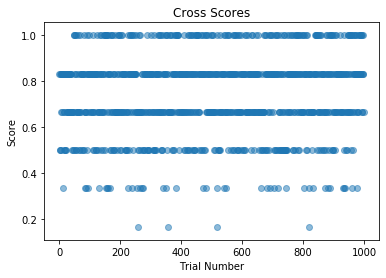

In [206]:
x = range(1000)
fig, ax = plt.subplots()
ax.scatter(x, rbf_svm_cross_test, alpha = .5)
ax.set_xlabel("Trial Number")
ax.set_ylabel("Score")
ax.set_title("Cross Scores")

## Analyze errors

In [207]:
X_train, X_cross, y_train, y_cross = model_selection.train_test_split(X, y, train_size=.9, random_state=1)
clf3 = svm.SVC(kernel='rbf', C=38, gamma='scale', random_state=i)
clf3.fit(X_train, y_train)
clf3.score(X_cross, y_cross)

0.6666666666666666

In [208]:
print('Actual   :', y_cross)
print('Predicted:', clf3.predict(X_cross))

Actual   : [1 0 0 1 0 0]
Predicted: [0 0 0 0 0 0]


In [209]:
def find_video(x_values):
    for v in range(len(X)):
        if (X[v, :] == x_values).all():
            return df.at[v, 'File name']
    print('No such video', x_values)

In [210]:
predict_cross = clf3.predict(X_cross)
failures = []
for i in range(len(X_cross)):
    if predict_cross[i] != y_cross[i]:
        failures.append(find_video(X_cross[i]))
print(failures)

['flame-spray-7.avi', 'flame-spray-11.avi']
